<a href="https://colab.research.google.com/github/pravvvv/Amazon_fine_food_reviews/blob/main/Amazon_fine_food_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Reading Data

## Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it is easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn.metrics import roc_auc_score
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

import os

C:\Users\pmallya1\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\pmallya1\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Preprocessing

1. Remove html tags
2. Remove punctuations, special characters
3. Check for alpha numeric (avoid in most cases)
4. Words have to be >2 length
5. Convert to lowercase
6. Remove stopwords
7. Snowball Stemming

# SVM

1. Lets apply SVM for the data set . We have 2 SVM algorithms :
    * Linear SVM
    * RBF Kernal
2. Next we would be tuning the hyper parameter 
3. Find the top 10 features 
4. Use ROC as performance metric

# Applying SVM

In [ ]:
#normalize
def c_vs_AUC_CV_Train(c_set,mean_auc_train_l1,mean_auc_cv_l1,mean_auc_train_l2,mean_auc_cv_l2):
        plt.plot(c_set[:],mean_auc_train_l1[0:],color='r', label='Train - L1',dashes=[6, 2])
        plt.plot(c_set[:],mean_auc_cv_l1[0:],color='b', label='CV - L1',dashes=[6, 2])
        plt.plot(c_set[:],mean_auc_train_l2[0:],color='r', label='Train - L2')
        plt.plot(c_set[:],mean_auc_cv_l2[0:],color='b', label='CV - L2')
        plt.title("Log c vs AUC" )
        plt.xlabel("Log c")
        plt.ylabel("AUC")
        plt.legend()
        plt.ylim(0, 1)
        plt.show()
def LogReg_apply(test_c_set,X_tr,X_cv,y_tr,y_cv,pen):
    cv_scores = []
    mean_auc_train = []
    mean_auc_cv = []
    n = 10
    for c in tqdm(test_c_set):
        # for each iteration, randomly hold out 20% of the data as CV set
        clf = LogisticRegression(penalty=pen, C=c)
        clf.fit(X_tr, y_tr)
        pred_train = clf.predict_proba(X_tr)
        pred_cv = clf.predict_proba(X_cv)
        mean_auc_cv.append(roc_auc_score(y_cv, pred_cv[:,1]))
        mean_auc_train.append(roc_auc_score(y_tr, pred_train[:,1]))

    df = pd.DataFrame({
        'c' : test_c_set,
        'c Log' : np.log(test_c_set),
        'AUC_CV' : mean_auc_cv,
        'AUC_train' : mean_auc_train
    })
    return df
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
def SVM_apply(alpha_set,X_tr,X_cv,y_tr,y_cv,X_te,y_test,penalties):
    #using Grid search
    import warnings
    warnings.filterwarnings('ignore')
    scaler = StandardScaler(with_mean=False)
    X_tr_sc = scaler.fit_transform(X_tr)
    X_cv_sc = scaler.fit_transform(X_cv)    
    X_te_sc = scaler.transform(X_te)
    parameter = {'alpha':alpha_set, 'penalty':penalties}
    print("Using Grid Search ...")
    clf = GridSearchCV(SGDClassifier(),parameter,verbose=1,scoring='roc_auc')
    clf.fit(X_tr_sc,y_tr)
    opt_alpha,opt_pen = clf.best_params_.get('alpha'),clf.best_params_.get('penalty')
    mean_auc_train = clf.cv_results_.get('mean_train_score')
    mean_auc_cv = clf.cv_results_.get('mean_test_score')
    param_set = clf.cv_results_['params']
    print("Optimal alpha : ",opt_alpha)
    print("Optimal penalty : ",opt_pen)
    
    auc_cv = []
    auc_train = []
    for i in range(len(mean_auc_cv)):
        auc_cv.append(round(mean_auc_cv[i],2))
        auc_train.append(round(mean_auc_train[i],2))
    alpha_list = []
    pen_list = []
    for i in param_set:
        alpha_list.append(i['alpha'])
        pen_list.append(i['penalty'])    

    df = pd.DataFrame({
        'AUC CV' : auc_cv,
        'AUC Train' : auc_train,
        'Alpha set' : alpha_list,
        'Log Alpha set' : np.log(alpha_list),
        'Penalty' : pen_list
    })
    print(df)
    
    df_l1 = df.loc[df['Penalty']=='l1']
    df_l2 = df.loc[df['Penalty']=='l2']
    c_vs_AUC_CV_Train(np.log(alpha_set),df_l1['AUC Train'],
                      df_l1['AUC CV'],df_l2['AUC Train'],df_l2['AUC CV'])
    #pred_train = clf.predict_proba(X_tr_sc)
    #pred_cv = clf.predict_proba(X_cv_sc)
    #pred_test = clf.predict_proba(X_test)
    best_sgd_model = SGDClassifier(penalty=opt_pen,alpha=opt_alpha)
    best_sgd_model.fit(X_tr_sc,y_train_ncv)
    pred_tr = best_sgd_model.decision_function(X_tr_sc)
    pred_cv = best_sgd_model.decision_function(X_cv_sc)
    pred_te = best_sgd_model.decision_function(X_te_sc)
    fpr1, tpr1, thresholds = roc_curve(y_train_ncv, pred_tr)
    fpr2, tpr2, thresholds = roc_curve(y_cv,  pred_cv)
    fpr3, tpr3, thresholds = roc_curve(y_test, pred_te)
    print("The AUC score for train data is : ",roc_auc_score(y_train_ncv, pred_tr))
    print("The AUC score for CV data is : ",roc_auc_score(y_cv,  pred_cv))
    print("The AUC score for test data is : ",roc_auc_score(y_test, pred_te))
    plt.plot(fpr1,tpr1,'r',label = 'Train data')
    plt.plot(fpr2,tpr2,'b',label = 'CV data')
    plt.plot(fpr3,tpr3,'g',label = 'Test data')
    plt.grid(True)
    plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.show()
    import seaborn as sn
    #https://stackoverflow.com/questions/47264597/confusion-matrix-from-probabilities
    import matplotlib.pyplot as plt1
    y_pred = best_sgd_model.predict(X_te_sc)
    conf_mat = confusion_matrix(y_test, y_pred )
    conf_mat_normalized = conf_mat.astype('int') / conf_mat.sum(axis=1)[:, np.newaxis]
    sn.heatmap(conf_mat , annot=True ,fmt='.1f' )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(classification_report(y_test, y_pred))
    #opt_row = df.loc[(df['Alpha set'] == opt_alpha) & (df['Penalty'] == opt_pen)]
    #plot graph between AUC CV and AUC Train
    

### Applying Linear SVM on BoW vectorization

In [ ]:
# Please write all the code with proper documentation
X_te_bow.shape

(30000, 9434)

Using Grid Search ...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    7.9s finished


Optimal alpha :  0.1
Optimal penalty :  l2
    AUC CV  AUC Train   Alpha set  Log Alpha set Penalty
0     0.85       0.95      0.0001      -9.210340      l1
1     0.86       0.99      0.0001      -9.210340      l2
2     0.83       0.88      0.0010      -6.907755      l1
3     0.87       0.99      0.0010      -6.907755      l2
4     0.71       0.72      0.0100      -4.605170      l1
5     0.88       0.99      0.0100      -4.605170      l2
6     0.64       0.65      0.1000      -2.302585      l1
7     0.90       0.98      0.1000      -2.302585      l2
8     0.51       0.51      1.0000       0.000000      l1
9     0.89       0.94      1.0000       0.000000      l2
10    0.50       0.50     10.0000       2.302585      l1
11    0.65       0.68     10.0000       2.302585      l2
12    0.50       0.50    100.0000       4.605170      l1
13    0.54       0.55    100.0000       4.605170      l2
14    0.50       0.50   1000.0000       6.907755      l1
15    0.54       0.55   1000.0000       6.907

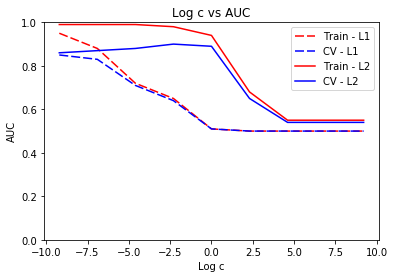

The AUC score for train data is :  0.9712966164707301
The AUC score for CV data is :  0.9113496638006111
The AUC score for test data is :  0.9111417475980608


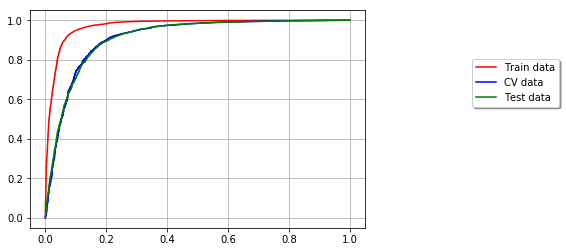

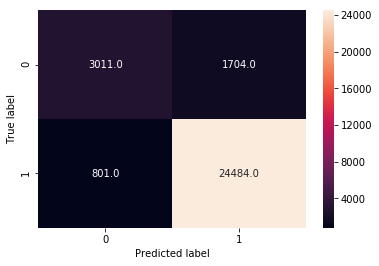

             precision    recall  f1-score   support

          0       0.79      0.64      0.71      4715
          1       0.93      0.97      0.95     25285

avg / total       0.91      0.92      0.91     30000



In [ ]:
X_tr = X_tr_bow
X_te = X_te_bow
X_cv = X_cv_bow

 
alpha_set = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
penalties = ['l1','l2']
SVM_apply(alpha_set,X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,penalties)

#### Top 10 features 

In [ ]:
#X_train_ncv, X_cv, y_train_ncv, y_cv,X_test,y_test

opt_alpha = 0.1
opt_penalty = 'l2'
count_vect = CountVectorizer(min_df=10)  #in scikit-learn
scaler = StandardScaler(with_mean=False)
X_tr_bow = count_vect.fit_transform(X_train_ncv)
X_te_bow = count_vect.transform(X_test)
X_cv_bow = count_vect.transform(X_cv)
X_tr_sc = scaler.fit_transform(X_tr_bow)
X_cv_sc = scaler.transform(X_cv_bow)    
X_te_sc = scaler.transform(X_te_bow)
feat = count_vect.get_feature_names()
best_sgd_model = SGDClassifier(penalty=opt_penalty,alpha=opt_alpha)
best_sgd_model.fit(X_tr_sc,y_train_ncv)
#red_tr = best_sgd_model.decision_function(X_tr_sc)
#red_cv = best_sgd_model.decision_function(X_cv_sc)
#red_te = best_sgd_model.decision_function(X_te_sc)
feature_coef_ = best_sgd_model.coef_[0]

df = pd.DataFrame({'coef' : feature_coef_, 
                   'Feature names ' : feat })
#Top 10 +ve features 
#print(feature_coef_.shape)

sorted_coef = df.sort_values('coef',ascending = False)
print("Top 10 positive features : ")
print(sorted_coef[0:10])

print("Top 10 negative features : ")
print(sorted_coef.tail(10))

Top 10 positive features : 
          coef Feature names 
3654  0.223757          great
3577  0.167414           good
693   0.153893           best
4845  0.149725           love
2184  0.133264      delicious
4850  0.115064          loves
2876  0.105300      excellent
5991  0.099520        perfect
8362  0.087883          tasty
5483  0.084733           nice
Top 10 negative features : 
          coef  Feature names 
2368 -0.059094  disappointment
8506 -0.063023         thought
2367 -0.072418   disappointing
3981 -0.073580        horrible
5294 -0.073725           money
503  -0.078254           awful
8434 -0.079754        terrible
9336 -0.092128           worst
2366 -0.100614    disappointed
5532 -0.117779             not


### Applying Linear SVM on TFIDF

Using Grid Search ...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    5.7s finished


Optimal alpha :  0.1
Optimal penalty :  l2
    AUC CV  AUC Train   Alpha set  Log Alpha set Penalty
0     0.91       0.97      0.0001      -9.210340      l1
1     0.92       0.98      0.0001      -9.210340      l2
2     0.87       0.91      0.0010      -6.907755      l1
3     0.92       0.98      0.0010      -6.907755      l2
4     0.74       0.75      0.0100      -4.605170      l1
5     0.93       0.99      0.0100      -4.605170      l2
6     0.60       0.60      0.1000      -2.302585      l1
7     0.94       0.98      0.1000      -2.302585      l2
8     0.51       0.51      1.0000       0.000000      l1
9     0.94       0.96      1.0000       0.000000      l2
10    0.50       0.50     10.0000       2.302585      l1
11    0.79       0.81     10.0000       2.302585      l2
12    0.50       0.50    100.0000       4.605170      l1
13    0.65       0.67    100.0000       4.605170      l2
14    0.50       0.50   1000.0000       6.907755      l1
15    0.65       0.67   1000.0000       6.907

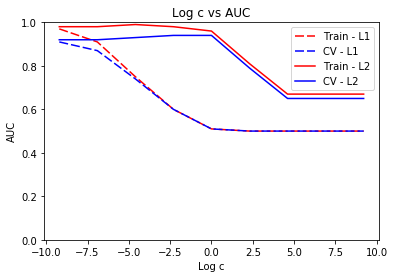

The AUC score for train data is :  0.9764138852362426
The AUC score for CV data is :  0.9490777806128627
The AUC score for test data is :  0.9503138914151734


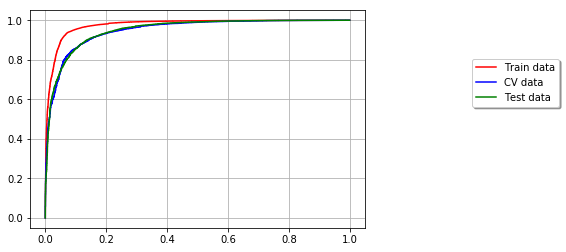

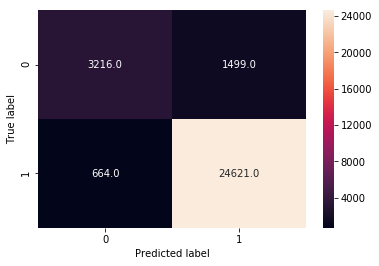

             precision    recall  f1-score   support

          0       0.83      0.68      0.75      4715
          1       0.94      0.97      0.96     25285

avg / total       0.92      0.93      0.92     30000



In [ ]:
X_tr = X_tr_tfidf
X_te = X_te_tdidf
X_cv = X_cv_tdidf
 
alpha_set = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
penalties = ['l1','l2']
SVM_apply(alpha_set,X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,penalties)

#### Top 10 features

In [ ]:
#X_train_ncv, X_cv, y_train_ncv, y_cv,X_test,y_test

opt_alpha = 0.1
opt_penalty = 'l2'

tf_idf_vect = TfidfVectorizer(ngram_range = (1,2), min_df = 50 )
X_tr_tfidf = tf_idf_vect.fit_transform(X_train_ncv)
X_te_tdidf = tf_idf_vect.transform(X_test)
X_cv_tdidf = tf_idf_vect.transform(X_cv)

X_tr_sc = scaler.fit_transform(X_tr_tfidf)
X_cv_sc = scaler.transform(X_cv_tdidf)  
X_te_sc = scaler.transform(X_te_tdidf)
feat = tf_idf_vect.get_feature_names()
best_sgd_model = SGDClassifier(penalty=opt_penalty,alpha=opt_alpha)
best_sgd_model.fit(X_tr_sc,y_train_ncv)
#red_tr = best_sgd_model.decision_function(X_tr_sc)
#red_cv = best_sgd_model.decision_function(X_cv_sc)
#red_te = best_sgd_model.decision_function(X_te_sc)
feature_coef_ = best_sgd_model.coef_[0]

df = pd.DataFrame({'coef' : feature_coef_, 
                   'Feature names ' : feat })
#Top 10 +ve features 
#print(feature_coef_.shape)

sorted_coef = df.sort_values('coef',ascending = False)
print("Top 10 positive features : ")
print(sorted_coef[0:10])

print("Top 10 negative features : ")
print(sorted_coef.tail(10))

Top 10 positive features : 
          coef Feature names 
2359  0.143168          great
2249  0.111554           good
1300  0.104331      delicious
420   0.100041           best
3123  0.096793           love
3158  0.081334          loves
4069  0.074875        perfect
3530  0.074508           nice
1693  0.074199      excellent
5502  0.072474          tasty
Top 10 negative features : 
          coef Feature names 
2604 -0.062333       horrible
3588 -0.063775            not
1403 -0.066678  disappointing
5560 -0.068772       terrible
313  -0.068808          awful
3606 -0.073567        not buy
3716 -0.074127  not recommend
3765 -0.080029      not worth
6189 -0.081837          worst
1400 -0.099747   disappointed


### Applying Linear SVM on AVG W2V

Using Grid Search ...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    5.4s finished


Optimal alpha :  0.01
Optimal penalty :  l2
    AUC CV  AUC Train   Alpha set  Log Alpha set Penalty
0     0.88       0.88      0.0001      -9.210340      l1
1     0.86       0.86      0.0001      -9.210340      l2
2     0.90       0.90      0.0010      -6.907755      l1
3     0.90       0.90      0.0010      -6.907755      l2
4     0.90       0.90      0.0100      -4.605170      l1
5     0.90       0.90      0.0100      -4.605170      l2
6     0.50       0.50      0.1000      -2.302585      l1
7     0.90       0.90      0.1000      -2.302585      l2
8     0.50       0.50      1.0000       0.000000      l1
9     0.89       0.89      1.0000       0.000000      l2
10    0.50       0.50     10.0000       2.302585      l1
11    0.78       0.78     10.0000       2.302585      l2
12    0.50       0.50    100.0000       4.605170      l1
13    0.63       0.63    100.0000       4.605170      l2
14    0.50       0.50   1000.0000       6.907755      l1
15    0.63       0.63   1000.0000       6.90

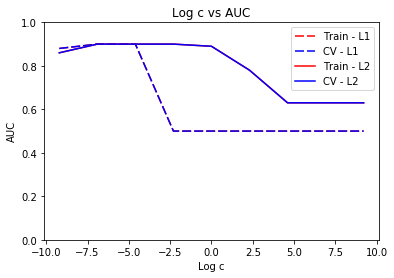

The AUC score for train data is :  0.904693369970633
The AUC score for CV data is :  0.8992434857247552
The AUC score for test data is :  0.9046218684934483


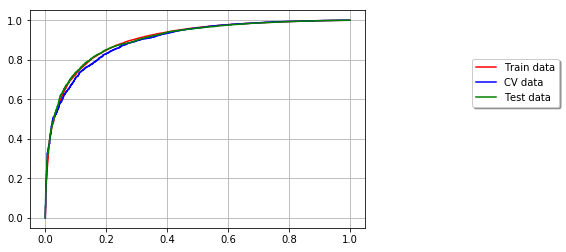

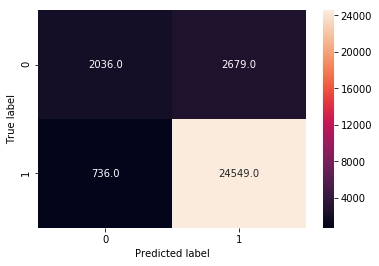

             precision    recall  f1-score   support

          0       0.73      0.43      0.54      4715
          1       0.90      0.97      0.93     25285

avg / total       0.88      0.89      0.87     30000



In [ ]:
# Please write all the code with proper documentation
X_tr = X_tr_avgw2v
X_te = X_te_avgw2v
X_cv = X_cv_avgw2v

alpha_set = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
penalties = ['l1','l2']
SVM_apply(alpha_set,X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,penalties)

### Applying Linear SVM on TFIDF W2V

Using Grid Search ...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    5.2s finished


Optimal alpha :  0.01
Optimal penalty :  l2
    AUC CV  AUC Train   Alpha set  Log Alpha set Penalty
0     0.83       0.83      0.0001      -9.210340      l1
1     0.83       0.83      0.0001      -9.210340      l2
2     0.87       0.87      0.0010      -6.907755      l1
3     0.86       0.87      0.0010      -6.907755      l2
4     0.85       0.85      0.0100      -4.605170      l1
5     0.88       0.88      0.0100      -4.605170      l2
6     0.50       0.50      0.1000      -2.302585      l1
7     0.87       0.87      0.1000      -2.302585      l2
8     0.50       0.50      1.0000       0.000000      l1
9     0.87       0.87      1.0000       0.000000      l2
10    0.50       0.50     10.0000       2.302585      l1
11    0.76       0.76     10.0000       2.302585      l2
12    0.50       0.50    100.0000       4.605170      l1
13    0.63       0.63    100.0000       4.605170      l2
14    0.50       0.50   1000.0000       6.907755      l1
15    0.63       0.63   1000.0000       6.90

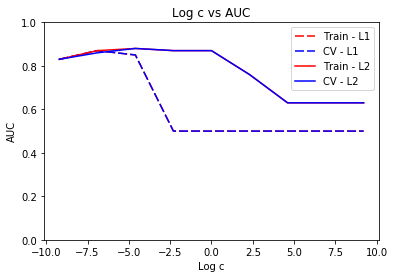

The AUC score for train data is :  0.8769033631800662
The AUC score for CV data is :  0.8713526729454416
The AUC score for test data is :  0.8721754606185141


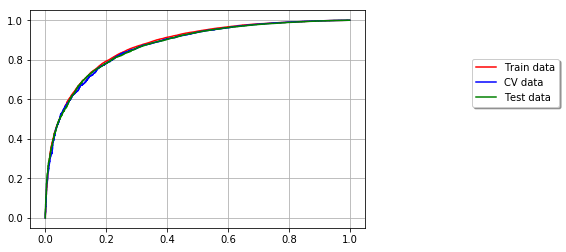

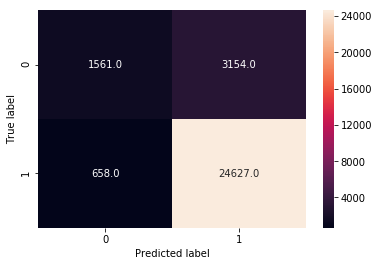

             precision    recall  f1-score   support

          0       0.70      0.33      0.45      4715
          1       0.89      0.97      0.93     25285

avg / total       0.86      0.87      0.85     30000



In [ ]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
X_tr = X_tr_tfidfw2v
X_te = X_test_tfidfw2v
X_cv = X_cv_tfidfw2v

alpha_set = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
penalties = ['l1','l2']
SVM_apply(alpha_set,X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,penalties)

In [ ]:
#Dataset 40k points with only review text and summary

import pickle as pkl
with open(r"C:\Users\pmallya1\Documents\AI\Assign\preprocessing_svm_40k",'rb')  as f:
    ([X_train_ncv, X_cv, y_train_ncv, y_cv,X_test,y_test])=pkl.load(f)
    #([X_tr_bow,X_te_bow,X_cv_bow])=pkl.load(f)
    ([X_tr_bow_500,X_te_bow_500,X_cv_500])=pkl.load(f)
    #([X_tr_tfidf ,X_te_tdidf,X_cv_tdidf ])=pkl.load(f)
    ([X_tr_tfidf_500,X_te_tdidf_500,X_cv_tdidf_500])=pkl.load(f)
    ([X_tr_avgw2v,X_te_avgw2v,X_cv_avgw2v])=pkl.load(f)
    ([X_tr_tfidfw2v,X_cv_tfidfw2v,X_test_tfidfw2v])=pkl.load(f)



In [ ]:
X_tr_bow_500.shape

(22400, 500)

In [ ]:
#normalize
def c_vs_AUC_CV_Train_Rbf(c_set,mean_auc_train_l1,mean_auc_cv_l1):
        plt.plot(c_set[:],mean_auc_train_l1[0:],color='r', label='Train')
        plt.plot(c_set[:],mean_auc_cv_l1[0:],color='b', label='CV')
        plt.title("Log c vs AUC" )
        plt.xlabel("Log c")
        plt.ylabel("AUC")
        plt.legend()
        plt.ylim(0, 1)
        plt.show()
def LogReg_apply(test_c_set,X_tr,X_cv,y_tr,y_cv,pen):
    cv_scores = []
    mean_auc_train = []
    mean_auc_cv = []
    n = 10
    for c in tqdm(test_c_set):
        # for each iteration, randomly hold out 20% of the data as CV set
        clf = LogisticRegression(penalty=pen, C=c)
        clf.fit(X_tr, y_tr)
        pred_train = clf.predict_proba(X_tr)
        pred_cv = clf.predict_proba(X_cv)
        mean_auc_cv.append(roc_auc_score(y_cv, pred_cv[:,1]))
        mean_auc_train.append(roc_auc_score(y_tr, pred_train[:,1]))

    df = pd.DataFrame({
        'c' : test_c_set,
        'c Log' : np.log(test_c_set),
        'AUC_CV' : mean_auc_cv,
        'AUC_train' : mean_auc_train
    })
    return df
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
def SVM_SVC_apply(alpha_set,X_tr,X_cv,y_tr,y_cv,X_te,y_test):
    #using Grid search
    import warnings
    #warnings.filterwarnings('ignore')
    scaler = StandardScaler(with_mean=False)
    X_tr_sc = scaler.fit_transform(X_tr)
    X_cv_sc = scaler.fit_transform(X_cv)    
    X_te_sc = scaler.transform(X_te)
    parameter = {'C':alpha_set}
    print("Using Grid Search ...")
    clf = GridSearchCV(SVC(),parameter,verbose=1,scoring='roc_auc')
    clf.fit(X_tr_sc,y_tr)
    opt_c = clf.best_params_.get('C')
    mean_auc_train = clf.cv_results_.get('mean_train_score')
    mean_auc_cv = clf.cv_results_.get('mean_test_score')
    #param_set = clf.cv_results_['params']
    print("Optimal C : ",opt_c)
    #print("Optimal penalty : ",opt_pen)
    
    #auc_cv = []
    #auc_train = []
    #for i in range(len(auc_cv_mean)):
    #    auc_cv.append(round(mean_auc_cv[i],2))
    #    auc_train.append(round(mean_auc_train[i],2))
    #alpha_list = []
    #pen_list = []
    #for i in param_set:
    #    alpha_list.append(i['alpha'])
    #    pen_list.append(i['penalty'])    
    return mean_auc_train,mean_auc_cv
    
    

In [ ]:
def test_results(X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,opt_c):
    #pred_train = clf.predict_proba(X_tr_sc)
    #pred_cv = clf.predict_proba(X_cv_sc)
    #pred_test = clf.predict_proba(X_test)
    scaler = StandardScaler(with_mean=False)
    X_tr_sc = scaler.fit_transform(X_tr)
    X_cv_sc = scaler.fit_transform(X_cv)    
    X_te_sc = scaler.transform(X_te)
    best_sgd_model = SVC(probability= True,C=opt_c)
    best_sgd_model.fit(X_tr_sc,y_train_ncv)
    pred_tr = best_sgd_model.decision_function(X_tr_sc)
    pred_cv = best_sgd_model.decision_function(X_cv_sc)
    pred_te = best_sgd_model.decision_function(X_te_sc)
    fpr1, tpr1, thresholds = roc_curve(y_train_ncv, pred_tr)
    fpr2, tpr2, thresholds = roc_curve(y_cv,  pred_cv)
    fpr3, tpr3, thresholds = roc_curve(y_test, pred_te)
    print("The AUC score for train data is : ",roc_auc_score(y_train_ncv, pred_tr))
    print("The AUC score for CV data is : ",roc_auc_score(y_cv,  pred_cv))
    print("The AUC score for test data is : ",roc_auc_score(y_test, pred_te))
    plt.plot(fpr1,tpr1,'r',label = 'Train data')
    plt.plot(fpr2,tpr2,'b',label = 'CV data')
    plt.plot(fpr3,tpr3,'g',label = 'Test data')
    plt.grid(True)
    plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    plt.show()
    import seaborn as sn
    #https://stackoverflow.com/questions/47264597/confusion-matrix-from-probabilities
    import matplotlib.pyplot as plt1
    y_pred = best_sgd_model.predict(X_te_sc)
    conf_mat = confusion_matrix(y_test, y_pred )
    conf_mat_normalized = conf_mat.astype('int') / conf_mat.sum(axis=1)[:, np.newaxis]
    sn.heatmap(conf_mat , annot=True ,fmt='.1f' )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(classification_report(y_test, y_pred))
    #opt_row = df.loc[(df['Alpha set'] == opt_alpha) & (df['Penalty'] == opt_pen)]
    #plot graph between AUC CV and AUC Train

### Applying RBF SVM on BOW

In [ ]:
# Please write all the code with proper documentation
X_tr = X_tr_bow_500
X_te = X_te_bow_500
X_cv = X_cv_500

#alpha_set = [1]
alpha_set = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
#penalties = ['l1','l2']
auc_tr_list_bow,auc_cv_list_bow = SVM_SVC_apply(alpha_set,X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test)



C:\Users\pmallya1\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmallya1\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmallya1\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pmallya1\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users

Using Grid Search ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 31.4min finished


Optimal C :  1


            C  AUC CV  AUC Train
0      0.0001    0.81       0.85
1      0.0010    0.88       0.95
2      0.0100    0.88       0.95
3      0.1000    0.88       0.95
4      1.0000    0.89       0.97
5     10.0000    0.88       1.00
6    100.0000    0.86       1.00
7   1000.0000    0.85       1.00
8  10000.0000    0.85       1.00
1.0 is the optimal C


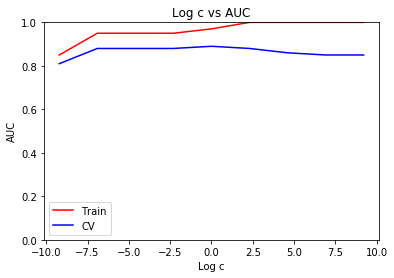

The AUC score for train data is :  0.9016415866960742
The AUC score for CV data is :  0.8649483789383694
The AUC score for test data is :  0.869304531468096


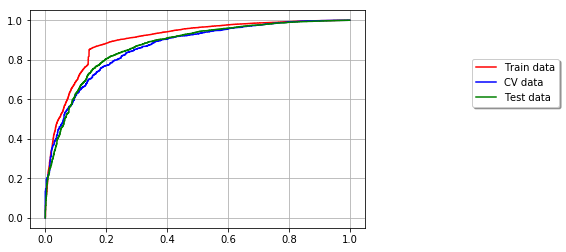

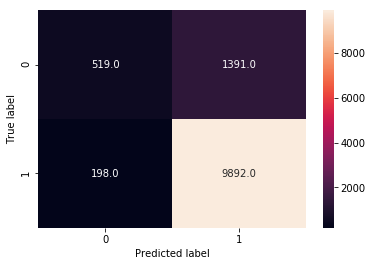

             precision    recall  f1-score   support

          0       0.72      0.27      0.40      1910
          1       0.88      0.98      0.93     10090

avg / total       0.85      0.87      0.84     12000



In [ ]:
auc_cv = []
auc_train = []
for i in range(len(auc_tr_list_bow)):
    auc_cv.append(round(auc_cv_list_bow[i],2))
    auc_train.append(round(auc_tr_list_bow[i],2))
    
df = pd.DataFrame({
    "C" : alpha_set,
    "AUC CV" : auc_cv,
    "AUC Train" : auc_train
})
print(df)
opt_row = df.loc[df["AUC CV"]==max(auc_cv)]
opt_C = opt_row['C'].values[0]
print(opt_C,"is the optimal C")
c_vs_AUC_CV_Train_Rbf(np.log(alpha_set),df['AUC Train'],df['AUC CV'])
test_results(X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,opt_C)

### Applying RBF SVM on TFIDF

In [ ]:
# Please write all the code with proper documentation
X_tr = X_tr_tfidf_500
X_te = X_te_tdidf_500
X_cv = X_cv_tdidf_500
 
alpha_set = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
#penalties = ['l1','l2']
auc_tr_list_tfidf,auc_cv_list_tfidf = SVM_SVC_apply(alpha_set,X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test)

Using Grid Search ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 34.2min finished


Optimal C :  10


            C  AUC CV  AUC Train
0      0.0001    0.82       0.86
1      0.0010    0.89       0.97
2      0.0100    0.89       0.97
3      0.1000    0.89       0.97
4      1.0000    0.89       0.99
5     10.0000    0.90       1.00
6    100.0000    0.90       1.00
7   1000.0000    0.90       1.00
8  10000.0000    0.90       1.00
10.0 is the optimal C


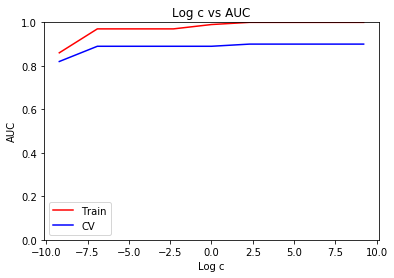

The AUC score for train data is :  0.9498635760043678
The AUC score for CV data is :  0.8580739614934783
The AUC score for test data is :  0.862561034459498


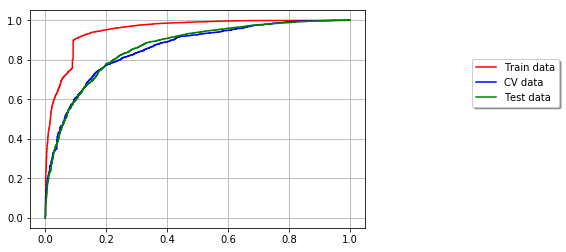

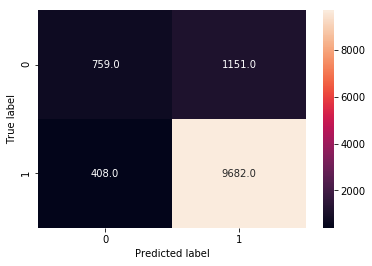

             precision    recall  f1-score   support

          0       0.65      0.40      0.49      1910
          1       0.89      0.96      0.93     10090

avg / total       0.86      0.87      0.86     12000



In [ ]:
auc_cv = []
auc_train = []
for i in range(len(auc_tr_list_tfidf)):
    auc_cv.append(round(auc_cv_list_tfidf[i],2))
    auc_train.append(round(auc_tr_list_tfidf[i],2))
    
df = pd.DataFrame({
    "C" : alpha_set,
    "AUC CV" : auc_cv,
    "AUC Train" : auc_train
})
print(df)
opt_row = df.loc[df["AUC CV"]==max(auc_cv)]
opt_C = opt_row['C'].values[0]
print(opt_C,"is the optimal C")
c_vs_AUC_CV_Train_Rbf(np.log(alpha_set),df['AUC Train'],df['AUC CV'])
test_results(X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,opt_C)

### Applying RBF SVM on AVG W2V

In [ ]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
X_tr = X_tr_avgw2v
X_te = X_te_avgw2v
X_cv = X_cv_avgw2v

alpha_set = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
penalties = ['l1','l2']
auc_tr_list_avgw2v,auc_cv_list_avgw2v = SVM_SVC_apply(alpha_set,X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test)

Using Grid Search ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  9.9min finished


Optimal C :  1


            C  AUC CV  AUC Train
0      0.0001    0.85       0.86
1      0.0010    0.87       0.88
2      0.0100    0.87       0.89
3      0.1000    0.87       0.89
4      1.0000    0.87       0.92
5     10.0000    0.87       0.97
6    100.0000    0.84       1.00
7   1000.0000    0.82       1.00
8  10000.0000    0.82       1.00
0.001 is the optimal C


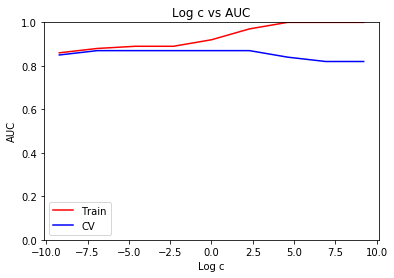

The AUC score for train data is :  0.8677468964341712
The AUC score for CV data is :  0.8579307642529342
The AUC score for test data is :  0.8574654808296016


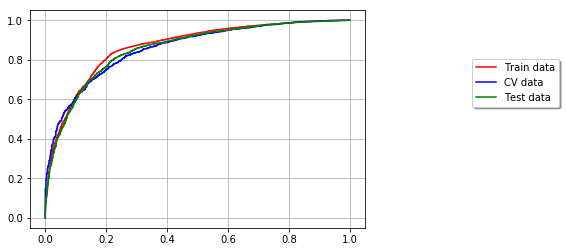

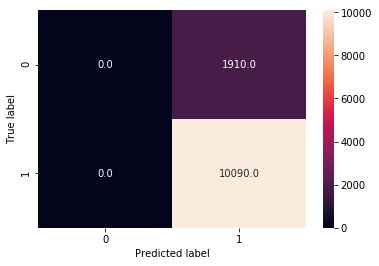

C:\Users\pmallya1\AppData\Local\Continuum\Anaconda3-5.2.0\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1910
          1       0.84      1.00      0.91     10090

avg / total       0.71      0.84      0.77     12000



In [ ]:
auc_cv = []
auc_train = []
for i in range(len(auc_tr_list_bow)):
    auc_cv.append(round(auc_cv_list_avgw2v[i],2))
    auc_train.append(round(auc_tr_list_avgw2v[i],2))
    
df = pd.DataFrame({
    "C" : alpha_set,
    "AUC CV" : auc_cv,
    "AUC Train" : auc_train
})
print(df)
opt_row = df.loc[df["AUC CV"]==max(auc_cv)]
opt_C = opt_row['C'].values[0]
print(opt_C,"is the optimal C")
c_vs_AUC_CV_Train_Rbf(np.log(alpha_set),df['AUC Train'],df['AUC CV'])
test_results(X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,opt_C)

### Applying RBF SVM on TFIDF W2V

In [ ]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# Please write all the code with proper documentation
X_tr = X_tr_tfidfw2v
X_te = X_test_tfidfw2v
X_cv = X_cv_tfidfw2v

alpha_set = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4]
penalties = ['l1','l2']
auc_tr_list_tfidfw2v,auc_cv_list_tfidfw2v = SVM_SVC_apply(alpha_set,X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test)

Using Grid Search ...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 11.3min finished


Optimal C :  1


            C  AUC CV  AUC Train
0      0.0001    0.83       0.84
1      0.0010    0.85       0.87
2      0.0100    0.85       0.87
3      0.1000    0.85       0.87
4      1.0000    0.86       0.91
5     10.0000    0.85       0.96
6    100.0000    0.81       0.99
7   1000.0000    0.79       1.00
8  10000.0000    0.79       1.00
1.0 is the optimal C


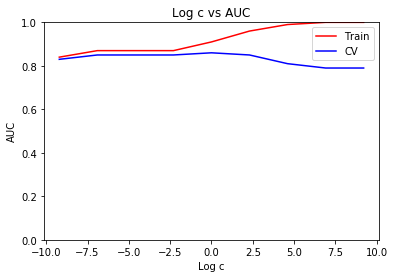

The AUC score for train data is :  0.9016415866960742
The AUC score for CV data is :  0.8649483789383694
The AUC score for test data is :  0.869304531468096


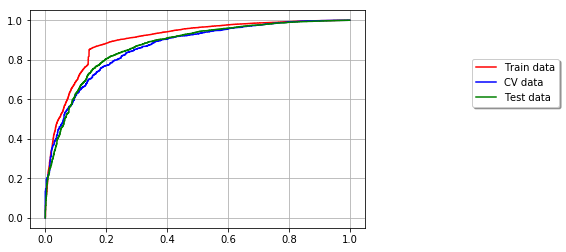

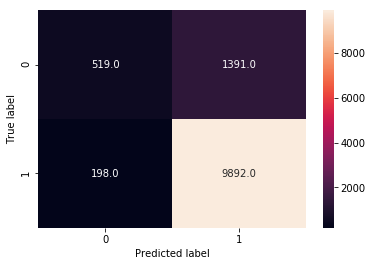

             precision    recall  f1-score   support

          0       0.72      0.27      0.40      1910
          1       0.88      0.98      0.93     10090

avg / total       0.85      0.87      0.84     12000



In [ ]:
auc_cv = []
auc_train = []
for i in range(len(auc_tr_list_bow)):
    auc_cv.append(round(auc_cv_list_tfidfw2v[i],2))
    auc_train.append(round(auc_tr_list_tfidfw2v[i],2))
    
df = pd.DataFrame({
    "C" : alpha_set,
    "AUC CV" : auc_cv,
    "AUC Train" : auc_train
})
print(df)
opt_row = df.loc[df["AUC CV"]==max(auc_cv)]
opt_C = opt_row['C'].values[0]
print(opt_C,"is the optimal C")
c_vs_AUC_CV_Train_Rbf(np.log(alpha_set),df['AUC Train'],df['AUC CV'])
test_results(X_tr,X_cv,y_train_ncv,y_cv,X_te,y_test,opt_C)

# Summary

In [ ]:

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Algorithm","Vectorization","Hyper parameter","AUC Train " , "AUC CV ", 
                 "AUC Test "]



x.add_row(['Linear SVM','BoW','Alpha = 0.1 : penalty=l2',0.97,0.91,0.91])
x.add_row(['Linear SVM','TFIDF','Alpha = 0.1 : penalty=l2',0.97,0.95,0.95])
x.add_row(['Linear SVM','Avg_W2V','Alpha = 0.01 : penalty=l2',0.9,0.9,0.9])
x.add_row(['Linear SVM','TFIDF_W2V','Alpha = 0.01 : penalty=l2',0.88,0.87,0.87])
x.add_row(['RBF SVM','BoW','C = 1',0.9,0.86,0.87])
x.add_row(['RBF SVM','TFIDF','C = 10',0.94,0.86,0.86])
x.add_row(['RBF SVM','Avg_W2V','C = 1',0.87,0.86,0.86])
x.add_row(['RBF SVM','TFIDF_W2V','C =0.001',0.9,0.86,0.87])

print(x)

+------------+---------------+---------------------------+------------+---------+-----------+
| Algorithm  | Vectorization |      Hyper parameter      | AUC Train  | AUC CV  | AUC Test  |
+------------+---------------+---------------------------+------------+---------+-----------+
| Linear SVM |      BoW      |  Alpha = 0.1 : penalty=l2 |    0.97    |   0.91  |    0.91   |
| Linear SVM |     TFIDF     |  Alpha = 0.1 : penalty=l2 |    0.97    |   0.95  |    0.95   |
| Linear SVM |    Avg_W2V    | Alpha = 0.01 : penalty=l2 |    0.9     |   0.9   |    0.9    |
| Linear SVM |   TFIDF_W2V   | Alpha = 0.01 : penalty=l2 |    0.88    |   0.87  |    0.87   |
|  RBF SVM   |      BoW      |           C = 1           |    0.9     |   0.86  |    0.87   |
|  RBF SVM   |     TFIDF     |           C = 10          |    0.94    |   0.86  |    0.86   |
|  RBF SVM   |    Avg_W2V    |           C = 1           |    0.87    |   0.86  |    0.86   |
|  RBF SVM   |   TFIDF_W2V   |          C =0.001         |  

# Observation
1. Linear SVM with TFIDF gives the best results with unseen data
2. RBF takes more time compared to linear SVM even with a lesser data set 
